In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import count
import math
import pandas as pd
import csv
import seaborn as sns

with open('listingsEnglish.csv','r') as f:
    listings = pd.read_csv(f)

listings.drop(columns=listings.columns[0], axis=1, inplace=True)
#listings['lodging_type','final_location'] = listings['location'].apply(lambda x: x.split('in'))

def convert_items (y):
    charset = [*[str(i) for i in range(10)]]
    y = ''.join([x for x in y if x in charset])
    return int(y)

listings['price_night'] = listings['price'].apply(convert_items)

def first_two(d):                
     return (d // 10 ** (int(math.log(d, 10)) - 1))

listings['price_per_night'] = listings.price_night.apply(first_two)
listings[['num_rating','reviews']]=listings['rating'].str.split('(', expand=True)
listings[['number_of_reviews','reviews2']]=listings['reviews'].str.split(')', expand=True)
listings[['lodging_type','final_location']] = listings['location'].str.split('in',expand=True)
listings = listings.drop(columns=['price','rating','reviews','reviews2','price_night'])

listings = listings.applymap(lambda x: x.strip() if isinstance(x,str) else x)
listings["num_rating"] = listings["num_rating"].apply(pd.to_numeric)
listings["number_of_reviews"] = listings["number_of_reviews"].apply(pd.to_numeric)

rating_price = listings[["num_rating","price_per_night"]]
reviews_price = listings[["number_of_reviews", "price_per_night"]]
listings['final_location'].replace('Paco', 'Manila',inplace=True)

In [2]:
listings

,location,name,beds,date,price_per_night,num_rating,number_of_reviews,lodging_type,final_location
0,Private room in Makati,TKA 407: Fully Furnished Studio near Makati CBD,1 double bed,Sep 18 – 25,16,4.80,49,Private room,Makati
1,Condo in Manila,8 Adriatico with Manila Bay view Ermita,1 queen bed,Nov 15 – 22,43,4.64,215,Condo,Manila
2,Apartment in Makati,TKA 408: Fully Furnished Studio near Makati CBD,1 double bed,Sep 19 – 26,16,4.76,45,Apartment,Makati
3,Apartment in Makati,Top Location! Makati Greenbelt Laureano Di Trevi,1 queen bed,Oct 23 – 30,16,4.40,10,Apartment,Makati
4,Condo in Pasay,"One Bedroom Condo in Roxas Boulevard, Pasay City",1 bed,Dec 30 – Jan 6,22,4.80,286,Condo,Pasay
...,...,...,...,...,...,...,...,...,...
295,Condo in Manila,"Cozy 1-bedroom unit in Taft Ave, Manila! (2-3 ...",2 beds,Jan 7 – 14,17,5.00,25,Condo,Manila
296,Condo in Quezon City,Staycation: Quezon City Studio Unit (Wifi+Netf...,2 beds,Sep 22 – 29,19,4.87,15,Condo,Quezon City
297,Condo in Mandaluyong,Studio @Edsa unliWifi Netflix,1 bed,Jan 31 – Feb 7,19,5.00,5,Condo,Mandaluyong
298,Condo in Makati,Studio at the Heart of the Makati CBD + NETFLIX,2 beds,Nov 15 – 22,35,4.84,62,Condo,Makati


<AxesSubplot:xlabel='price_per_night', ylabel='num_rating'>

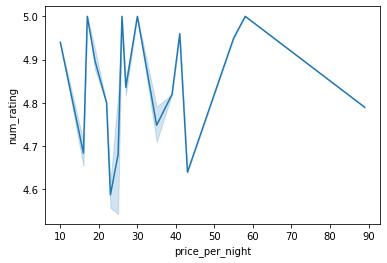

In [4]:
sns.lineplot(data=listings, x="price_per_night", y="num_rating")

<AxesSubplot:xlabel='price_per_night', ylabel='number_of_reviews'>

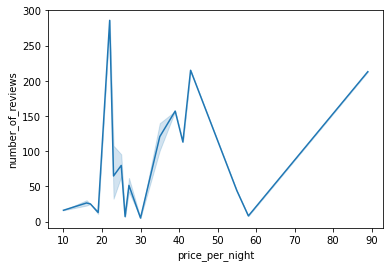

In [7]:
sns.lineplot(data=listings, x="price_per_night", y="number_of_reviews")

<AxesSubplot:xlabel='beds', ylabel='price_per_night'>

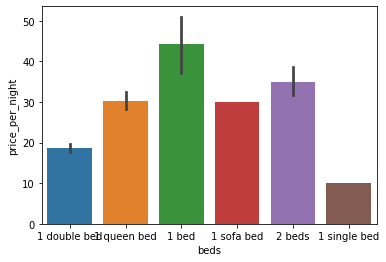

In [9]:
sns.barplot(data=listings, x="beds", y="price_per_night")

<AxesSubplot:xlabel='final_location', ylabel='price_per_night'>

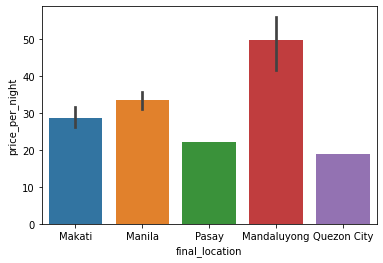

In [10]:
sns.barplot(data=listings, x="final_location", y="price_per_night")

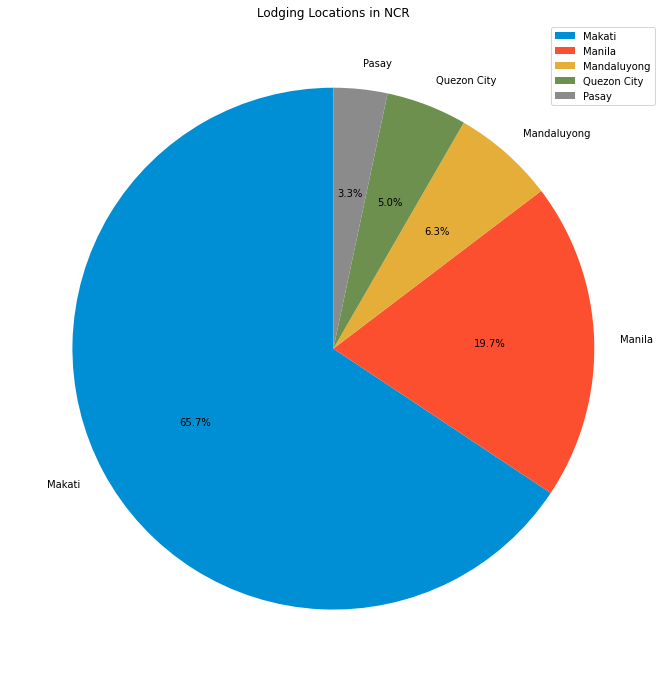

In [11]:
locations_labels = listings.final_location.value_counts().index
locations_colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b','#9400d3']
locations_shape = listings.final_location.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(locations_shape,labels=locations_labels,colors=locations_colors, autopct = '%1.1f%%', startangle=90)
plt.legend()
plt.title('Lodging Locations in NCR')
plt.show()

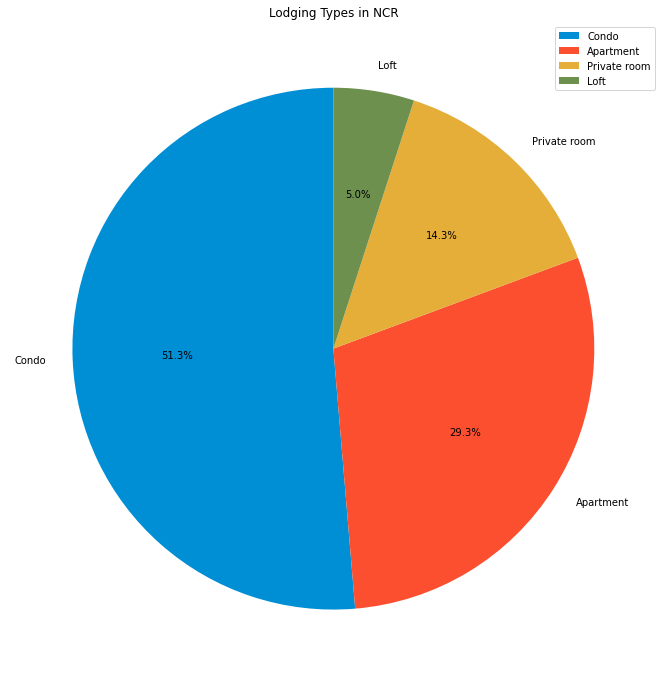

In [12]:
lodging_labels = listings.lodging_type.value_counts().index
lodging_colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b','#9400d3']
lodging_shape = listings.lodging_type.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(lodging_shape,labels=lodging_labels,colors=lodging_colors, autopct = '%1.1f%%', startangle=90)
plt.legend()
plt.title('Lodging Types in NCR')
plt.show()